# 1.0. Data Analysis

In this notebook, we do some simple data analysis on the dataset to visualize the distribution of classes across replicates. This notebook also demonstrates how to load the whole dataset, the training set, the test set, and the balanced test set.

In [1]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

import sys 
sys.path.append('..')
from src.constants import (
    SAMPLES_DICT_3CLASS, METADATA_DICT_3CLASS, TEST_INDICES_DICT_3CLASS,
    replace_base_data_dir
)
from src.utils_data import load_train_data, load_test_data

In [2]:
# TODO: If the dataset is not in the current directory, then set `base_dir` to be
# the path to the directory that contains the dataset.
base_dir = ""
if base_dir != "":
    SAMPLES_DICT_3CLASS = replace_base_data_dir(SAMPLES_DICT_3CLASS, base_dir)
    METADATA_DICT_3CLASS = replace_base_data_dir(METADATA_DICT_3CLASS, base_dir)
    TEST_INDICES_DICT_3CLASS = replace_base_data_dir(TEST_INDICES_DICT_3CLASS, base_dir)

train_test_split_ids = [0, 1, 2, 3]
num_classes = 3

In [3]:
# Load all data
X_all, y_all, samples_all, labels_key = load_train_data(
    SAMPLES_DICT_3CLASS, -1, balance=False
)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
c_list, n_list = np.unique(y_all, return_counts=True)
print(f"Number of signal events: {len(X_all)}")
for i in range(num_classes):
    print(f"\t{labels_key[c_list[i]]}: {n_list[i]}")

Number of signal events: 2372273
	heart: 488252
	adrenal: 890480
	aorta: 993541


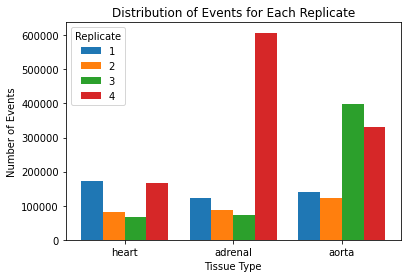

In [5]:
# Plot the event length distribution
num_samples = len(np.unique(samples_all))
class_names = list(labels_key.values())
labels_samples = np.concatenate((y_all.reshape(-1, 1), samples_all.reshape(-1, 1)), axis=1)
unique_labels_samples, unique_labels_samples_counts = np.unique(labels_samples, return_counts=True, axis=0)

# For each sample num, construct list of the number of events per class
sample_counts = []
for s in range(num_samples):
    sample_counts.append(unique_labels_samples_counts[s::num_samples])

X = class_names
X_axis = np.arange(len(class_names))

offsets = [-0.3, -0.1, 0.1, 0.3]
width = 0.2

for s in range(num_samples):
    plt.bar(X_axis + offsets[s], sample_counts[s], width, label=s+1)

plt.xticks(X_axis, X)
plt.xlabel("Tissue Type")
plt.ylabel("Number of Events")
plt.title("Distribution of Events for Each Replicate")
plt.legend(title="Replicate")
# plt.savefig("../figs/distribution_all_events_sample_class.png", dpi=300)
plt.show()

  0%|          | 0/2372273 [00:00<?, ?it/s]

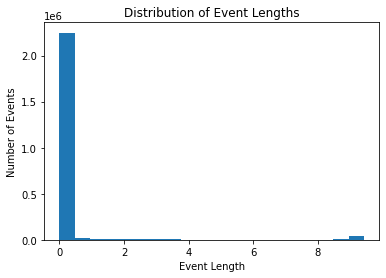

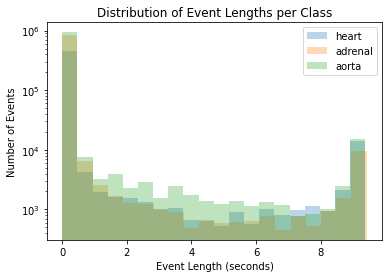

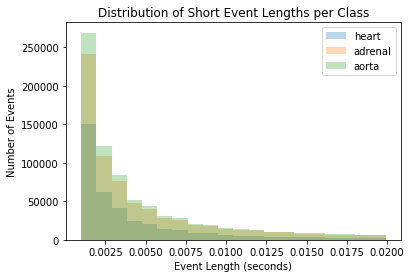

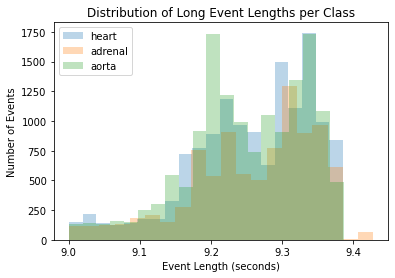

In [6]:
# Distribution of event lengths

obs_per_second = 10000
event_lengths = [len(event) / obs_per_second for event in tqdm(X_all)]  # To convert to seconds
plt.hist(event_lengths, bins=20)
plt.xlabel("Event Length")
plt.ylabel("Number of Events")
plt.title("Distribution of Event Lengths")
# plt.savefig("../figs/distribution_event_lengths.png", dpi=300)
plt.show()

for c in range(num_classes):
    event_lengths_per_class = np.array(event_lengths)[y_all == c]
    plt.hist(event_lengths_per_class, bins=20, label=labels_key[c], alpha=0.3)
plt.legend()
plt.yscale("log")
plt.xlabel("Event Length (seconds)")
plt.ylabel("Number of Events")
plt.title("Distribution of Event Lengths per Class")
# plt.savefig("../figs/distribution_all_event_lengths_per_class.png", dpi=300)
plt.show()

for c in range(num_classes):
    event_lengths_per_class = [l for l in np.array(event_lengths)[y_all == c] if l < (200 / obs_per_second)]
    plt.hist(event_lengths_per_class, bins=20, label=labels_key[c], alpha=0.3)
plt.legend()
plt.xlabel("Event Length (seconds)")
plt.ylabel("Number of Events")
plt.title("Distribution of Short Event Lengths per Class")
# plt.savefig("../figs/distribution_short_event_lengths_per_class.png", dpi=300)
plt.show()

for c in range(num_classes):
    event_lengths_per_class = [l for l in np.array(event_lengths)[y_all == c] if l > (90000 / obs_per_second)]
    plt.hist(event_lengths_per_class, bins=20, label=labels_key[c], alpha=0.3)
plt.legend()
plt.xlabel("Event Length (seconds)")
plt.ylabel("Number of Events")
plt.title("Distribution of Long Event Lengths per Class")
# plt.savefig("../figs/distribution_long_event_lengths_per_class.png", dpi=300)
plt.show()

In [7]:
# Get number of events before and after balancing

# For each train-test split
test_counts_before_balance = np.unique(samples_all, return_counts=True)[1]
test_counts_after_balance = []
for train_test_split_id in train_test_split_ids:
    # Load test data
    X_test, y_test, samples_test = load_test_data(
        SAMPLES_DICT_3CLASS, train_test_split_id, indices_dict=TEST_INDICES_DICT_3CLASS
    )
    test_counts_after_balance.append(len(X_test))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

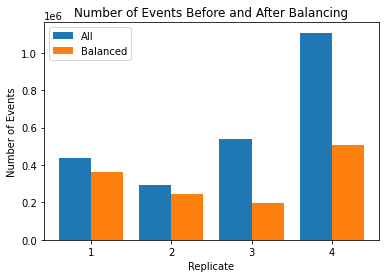

In [8]:
X_axis = np.arange(len(test_counts_before_balance))
X = [1, 2, 3, 4]
  
plt.bar(X_axis - 0.2, test_counts_before_balance, 0.4, label = 'All')
plt.bar(X_axis + 0.2, test_counts_after_balance, 0.4, label = 'Balanced')
  
plt.xticks(X_axis, X)
plt.xlabel("Replicate")
plt.ylabel("Number of Events")
plt.title("Number of Events Before and After Balancing")
plt.legend()
# plt.savefig("../figs/events_before_after_balancing.png", dpi=300)
plt.show()